In [226]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
# plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.figsize'] = (10, 5)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [227]:
# train_df = pd.read_csv("data/train.csv", dtype={'target':'category'})
train_df = pd.read_csv("data/train.csv")

In [228]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**There are a lot of locations missings**

In [229]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [230]:
# Analysing null values
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [231]:
# Lets see the number of (rows, cols)
print(train_df.shape)

(7613, 5)


In [232]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

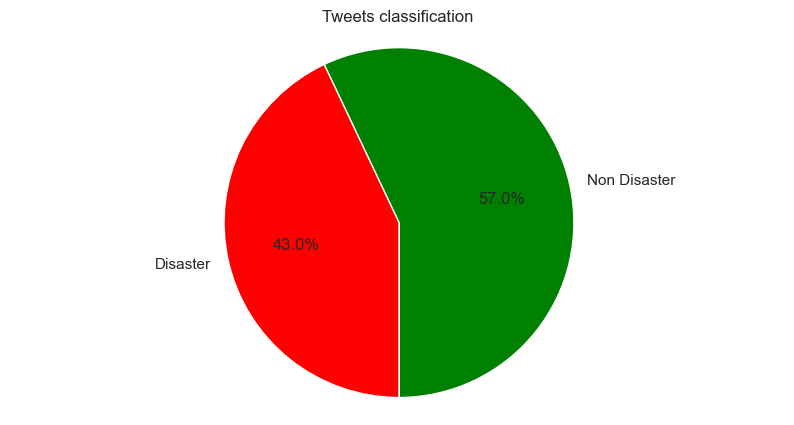

In [233]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non Disaster', 'Disaster'

fig1, ax1 = plt.subplots()
ax1.pie(train_df['target'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=False, startangle=270, colors=['green','red'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tweets classification')
plt.show()


In [234]:
# Lets count the number of words and length
train_df['words_count'] = train_df['text'].apply(lambda x: len(x.lower().split()))
train_df['length'] = train_df['text'].apply(lambda x: len(x))
train_df.head()

,id,keyword,location,text,target,words_count,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88


In [235]:
# metricas generales de las columnas o features numericos del data frame que podemos analizar via .describe
train_df.describe(include='all')

,id,keyword,location,text,target,words_count,length
count,"7,613.00",7552,5080,7613,"7,613.00","7,613.00","7,613.00"
unique,nan,221,3341,7503,nan,nan,nan
top,nan,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,nan,nan,nan
freq,nan,45,104,10,nan,nan,nan
mean,"5,441.93",NaN,NaN,NaN,0.43,14.90,101.04
std,"3,137.12",NaN,NaN,NaN,0.50,5.73,33.78
min,1.00,NaN,NaN,NaN,0.00,1.00,7.00
25%,"2,734.00",NaN,NaN,NaN,0.00,11.00,78.00
50%,"5,408.00",NaN,NaN,NaN,0.00,15.00,107.00
75%,"8,146.00",NaN,NaN,NaN,1.00,19.00,133.00


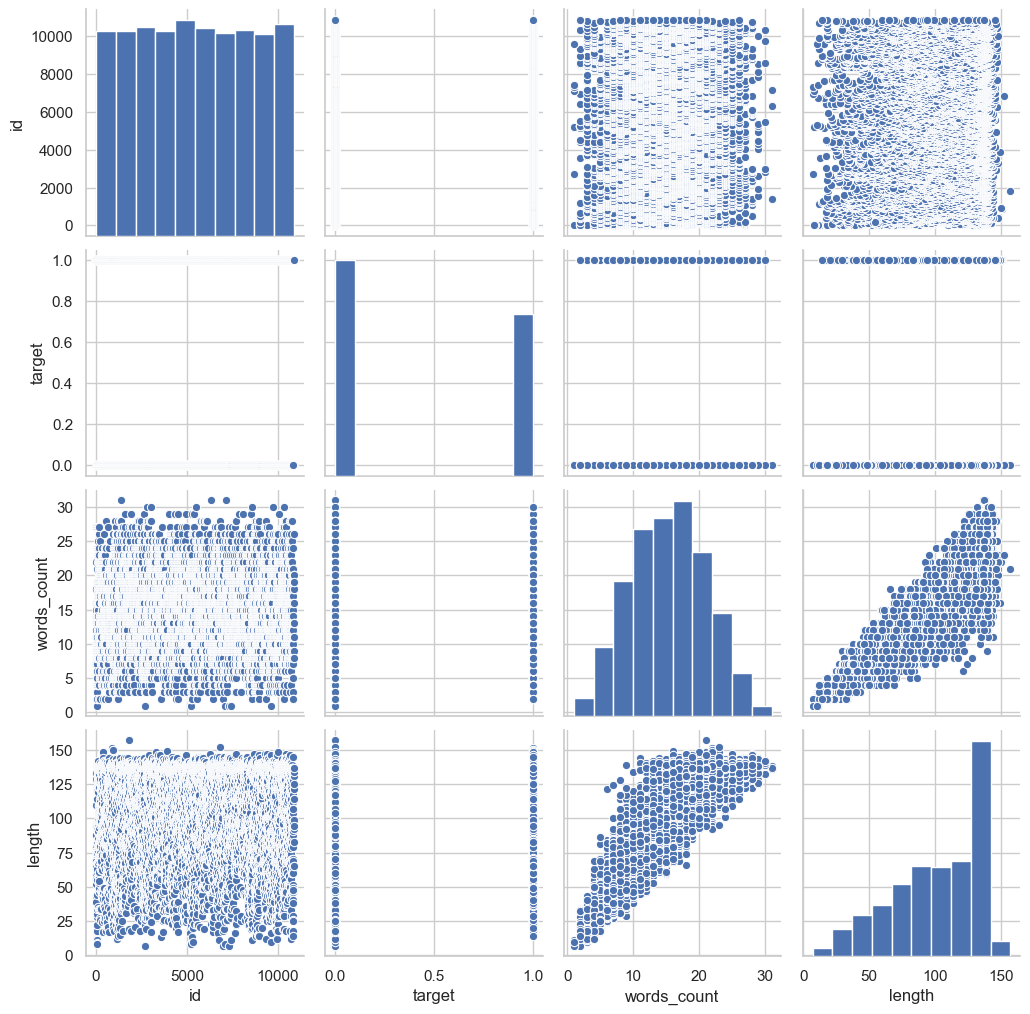

In [236]:
# correlations
sns.pairplot(train_df)

**Lets analyze value counts for words count**

In [237]:
train_df['words_count'].value_counts()

11    497
18    494
17    494
16    451
14    450
13    445
15    425
12    415
20    409
19    390
9     363
10    334
21    296
8     293
22    279
7     242
23    220
24    189
6     186
5     159
25    129
4     115
26     98
3      75
27     60
28     41
2      34
29     13
1       8
30      6
31      3
Name: words_count, dtype: int64

In [238]:
train_df["words_count"].describe()

count               7,613.00
mean                   14.90
std                     5.73
min                     1.00
25%                    11.00
50%                    15.00
75%                    19.00
max                    31.00
Name: words_count, dtype: float64

Text(0, 0.5, 'Densidad')

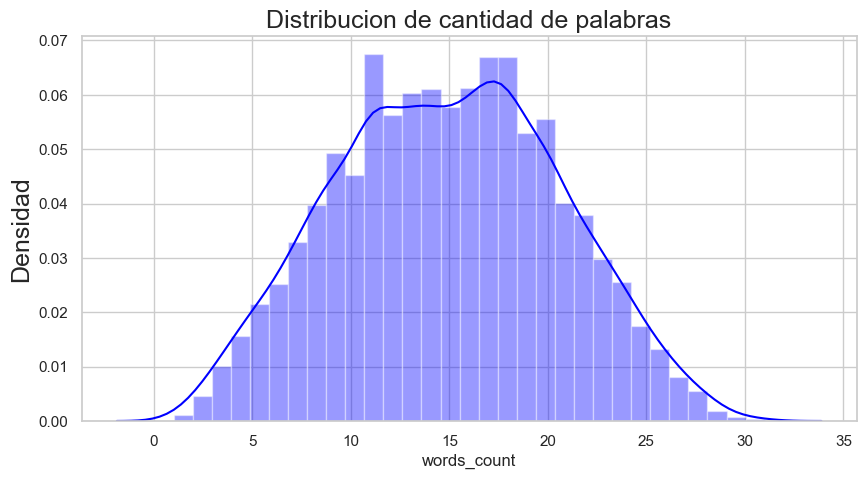

In [239]:
g = sns.distplot(train_df["words_count"], color="blue", label='Word count for tweets', hist=True, bins=31)
g.set_title("Distribucion de cantidad de palabras", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

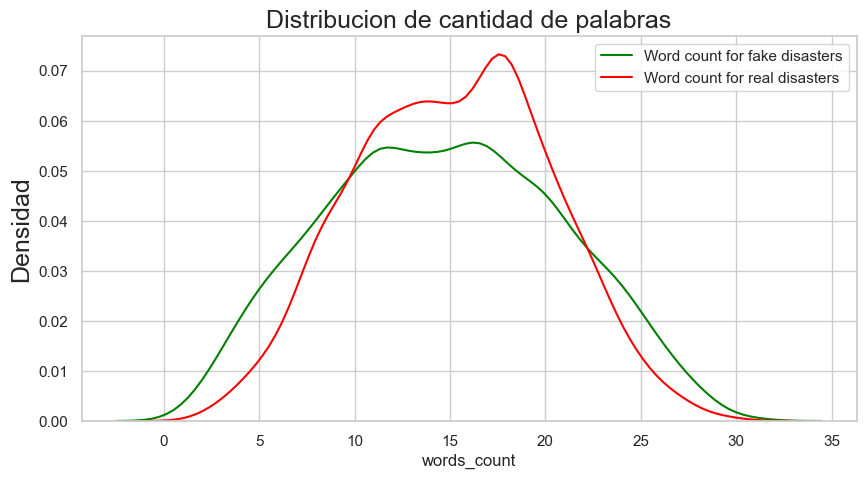

In [240]:
g = sns.distplot(train_df[train_df["target"] == 0]["words_count"], color="green", label='Word count for fake disasters', hist=False)
g = sns.distplot(train_df[train_df["target"] == 1]["words_count"], color="red", label='Word count for real disasters', hist=False)

g.set_title("Distribucion de cantidad de palabras", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

### As we can see words count have pretty similar distribution for real and fake disasters

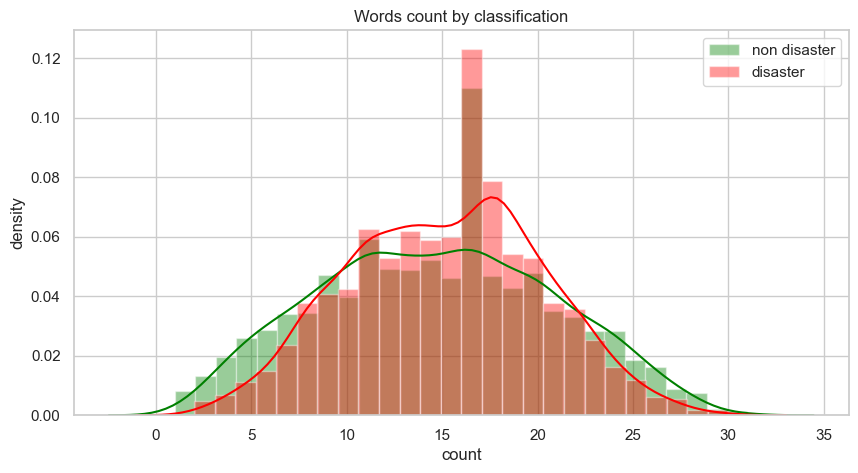

In [241]:
import random
import numpy
from matplotlib import pyplot

x = train_df[train_df["target"] == 0]["words_count"]
y = train_df[train_df["target"] == 1]["words_count"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Words count by classification')
plt.xlabel('count')
plt.ylabel('density')

plt.show()

### we can also see this in the correlation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


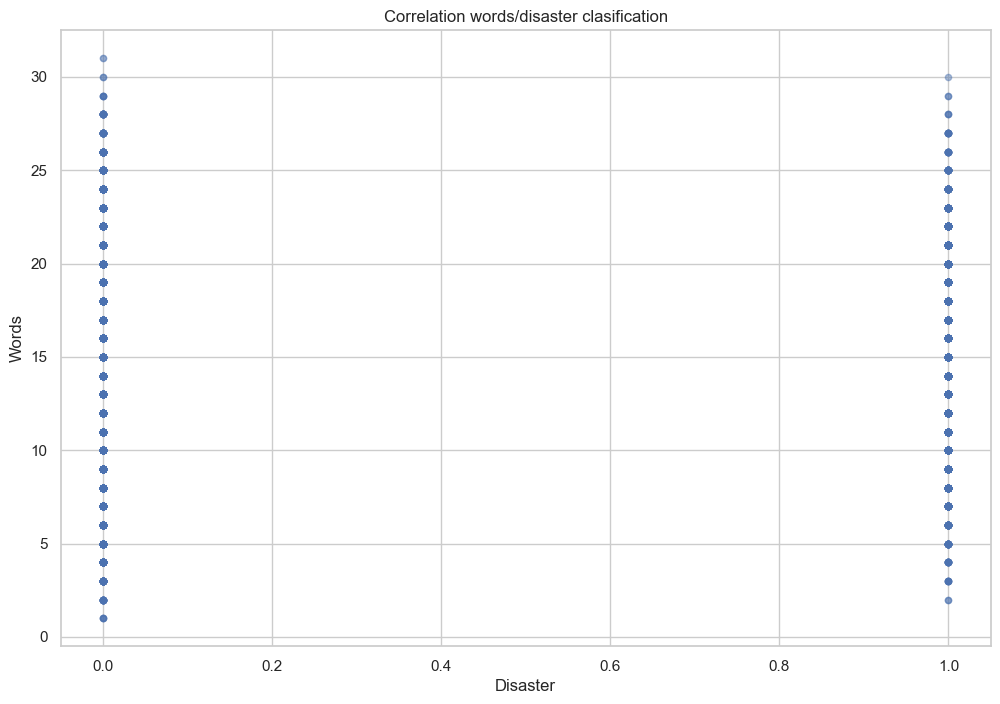

In [242]:
train_df.plot.scatter('target','words_count', title='Correlation words/disaster clasification',alpha=0.25,figsize=(12,8));
ax=plt.gca()
ax.set_ylabel('Words')
ax.set_xlabel('Disaster');

In [243]:
train_df.corr()

,id,target,words_count,length
id,1.00,0.06,0.01,0.02
target,0.06,1.00,0.04,0.18
words_count,0.01,0.04,1.00,0.84
length,0.02,0.18,0.84,1.00


### it doent look like there is a strong correlationship between them, 
### Lets analyze similar analysis for tweet length

In [244]:
train_df['length'].value_counts()

136    401
139    275
138    256
140    218
137    210
      ... 
150      2
151      1
152      1
149      1
157      1
Name: length, Length: 147, dtype: int64

In [245]:
train_df["length"].describe()

count               7,613.00
mean                  101.04
std                    33.78
min                     7.00
25%                    78.00
50%                   107.00
75%                   133.00
max                   157.00
Name: length, dtype: float64

Text(0, 0.5, 'Densidad')

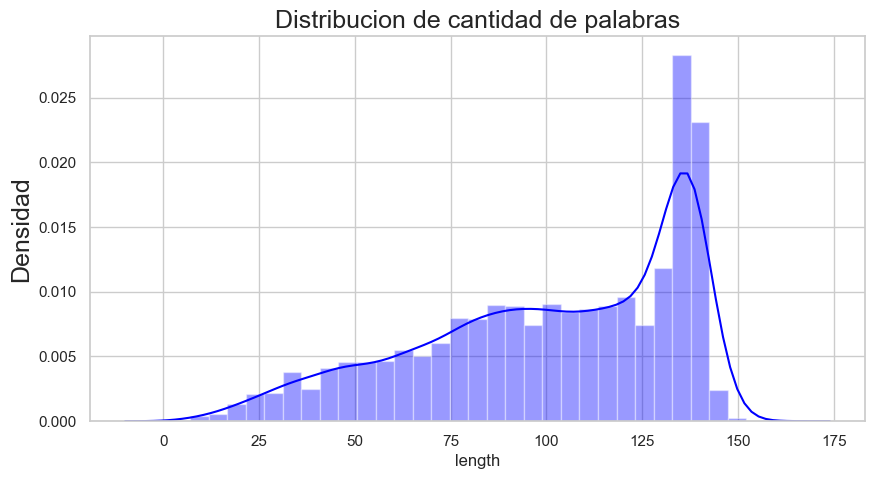

In [246]:
g = sns.distplot(train_df["length"], color="blue", label='Tweet length', hist=True, bins=31)
g.set_title("Distribucion de cantidad de palabras", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

In [247]:
train_df[train_df["target"] == 0]["length"].describe()

count               4,342.00
mean                   95.71
std                    35.89
min                     7.00
25%                    68.00
50%                   101.00
75%                   130.00
max                   157.00
Name: length, dtype: float64

In [248]:
train_df[train_df["target"] == 1]["length"].describe()

count               3,271.00
mean                  108.11
std                    29.31
min                    14.00
25%                    88.00
50%                   115.00
75%                   136.00
max                   151.00
Name: length, dtype: float64

Text(0, 0.5, 'Density')

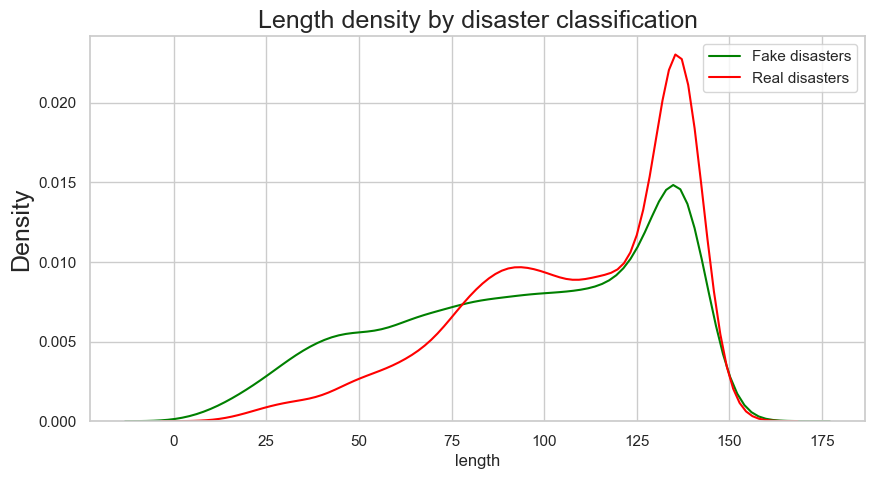

In [249]:
g = sns.distplot(train_df[train_df["target"] == 0]["length"], color="green", label='Fake disasters', hist=False)
g = sns.distplot(train_df[train_df["target"] == 1]["length"], color="red", label='Real disasters', hist=False)

g.set_title("Length density by disaster classification", fontsize=18)
g.set_ylabel("Density", fontsize=18)

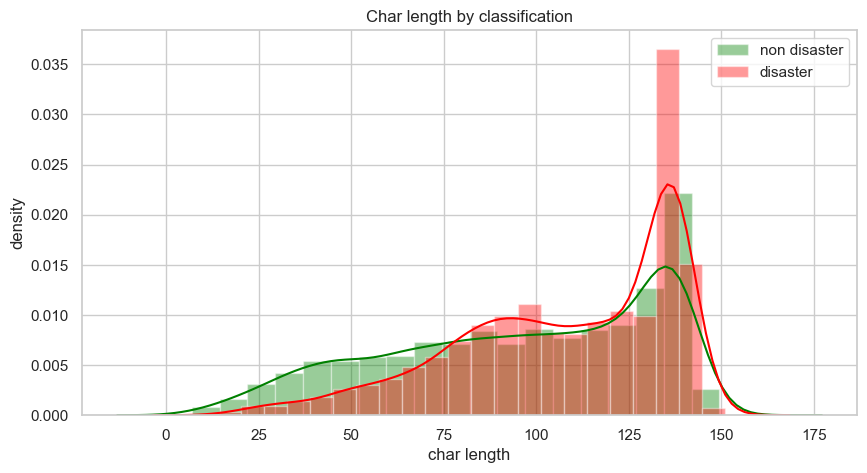

In [250]:
x = train_df[train_df["target"] == 0]["length"]
y = train_df[train_df["target"] == 1]["length"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Char length by classification')
plt.xlabel('char length')
plt.ylabel('density')

plt.show()

In [251]:
train_df.loc[(train_df["target"] == 0) & (train_df["length"] < 15)].shape[0]/train_df.loc[train_df["length"] < 15].shape[0]

0.9629629629629629

In [252]:
train_df.loc[(train_df["target"] == 0) & (train_df["length"] < 50)].shape[0]/train_df.loc[train_df["length"] < 50].shape[0]

0.807843137254902

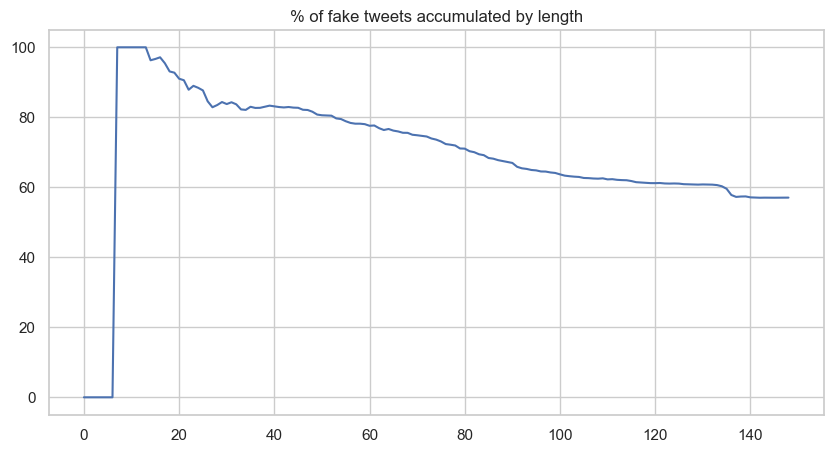

In [253]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] < x)].shape[0]/train_df.loc[train_df["length"] < x].shape[0] \
               if train_df.loc[train_df["length"] < x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
pd_series.plot.line(title='% of fake tweets accumulated by length')

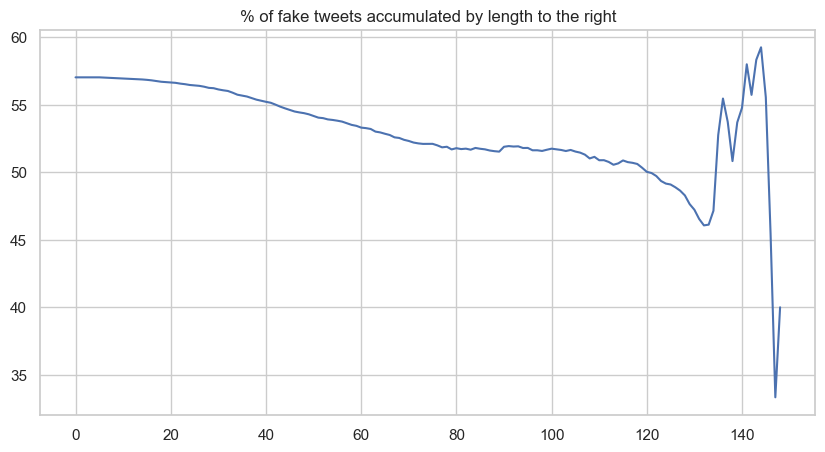

In [254]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] > x)].shape[0]/train_df.loc[train_df["length"] > x].shape[0] \
               if train_df.loc[train_df["length"] > x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
pd_series.plot.line(title='% of fake tweets accumulated by length to the right')

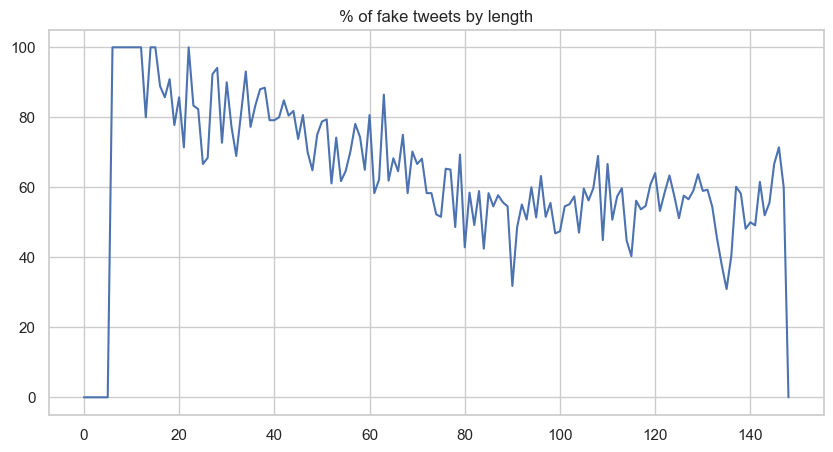

In [255]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] == x)].shape[0]/train_df.loc[train_df["length"] == x].shape[0] \
               if train_df.loc[train_df["length"] == x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
pd_series.plot.line(title='% of fake tweets by length')

As we can see for really short tweets there is hight change of being fake
80% of short tweets (50 chars or less) announce fake disasters
96% of short tweets (15 chars or less) announce fake disasters

### Lets analyze the keywords

In [256]:
train_df.keyword.describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [257]:
train_df['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [258]:
train_df['keyword'].value_counts().describe()

count                 221.00
mean                   34.17
std                     4.79
min                     9.00
25%                    33.00
50%                    35.00
75%                    37.00
max                    45.00
Name: keyword, dtype: float64

In [259]:
mean = train_df['keyword'].value_counts().mean()
mean

34.171945701357465

### Lets take 35 as a high number of keyword apparence

Text(0.5, 0, 'keywords')

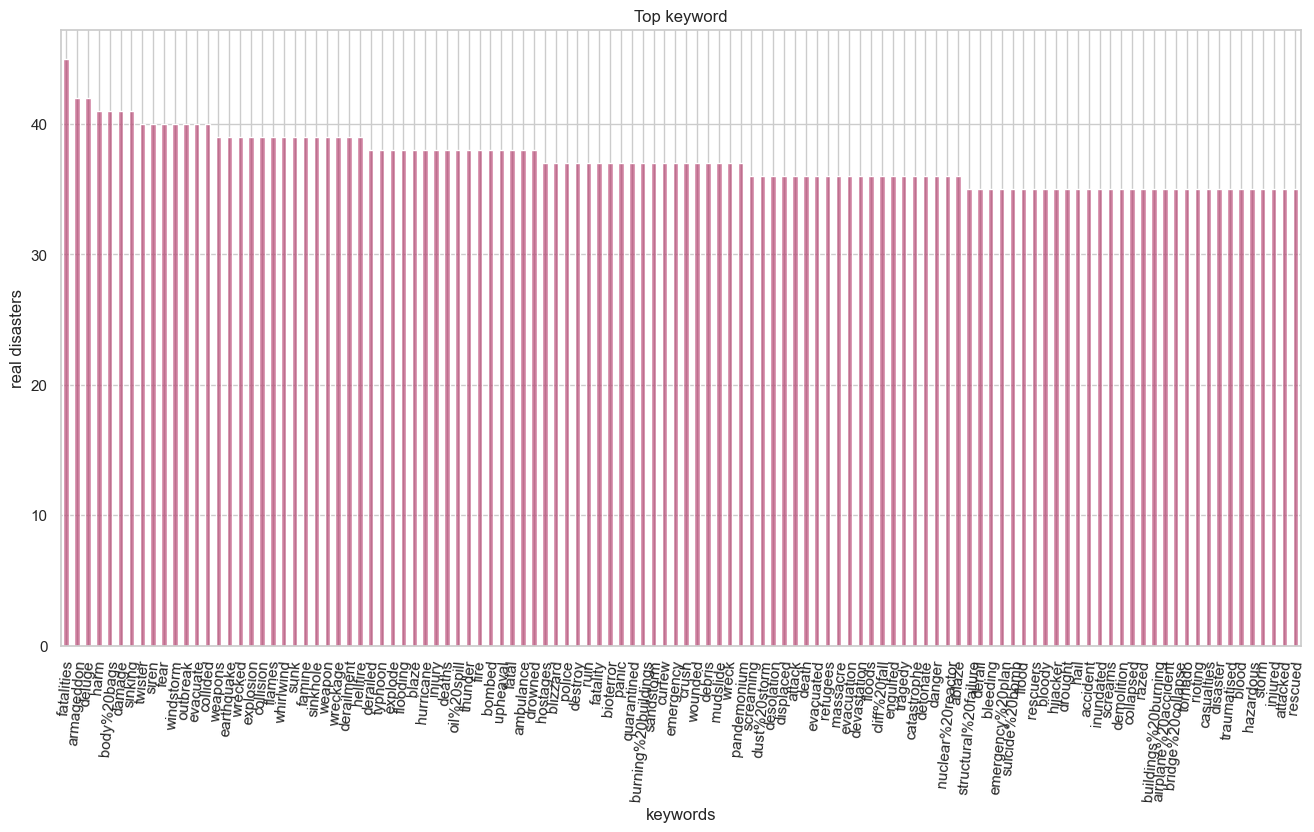

In [260]:
train_df['keyword'].value_counts()[(train_df['keyword'].value_counts() > mean)].plot(kind='bar',figsize=(16,8),rot=85,title='Top keyword',color=(0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel('real disasters');
ax.set_xlabel('keywords')


Lets take analyze keywords over 39 to keep the most representative values only

In [261]:
kw_more_than_38 = train_df.groupby("keyword").filter(lambda x: len(x) >= 39)

In [262]:
top_kw = kw_more_than_38.groupby('keyword').agg({'target': ['sum','count', 'mean', 'std'], 'length': ['mean', 'std']})
level0 = top_kw.columns.get_level_values(0)
level1 = top_kw.columns.get_level_values(1)
top_kw.columns = level0 + '_' + level1
top_kw = top_kw.reset_index()
top_kw['negative_cases'] = top_kw['target_count'] - top_kw['target_sum']
top_kw

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
0,armageddon,5,42,0.12,0.33,102.02,33.40,37
1,body%20bags,1,41,0.02,0.16,100.78,37.69,40
2,collided,23,40,0.57,0.50,117.03,28.10,17
3,collision,29,39,0.74,0.44,101.33,24.18,10
4,damage,19,41,0.46,0.50,93.73,37.47,22
5,deluge,6,42,0.14,0.35,111.17,30.27,36
6,derailment,39,39,1.00,0.00,109.79,25.09,0
7,earthquake,30,39,0.77,0.43,107.64,34.69,9
8,evacuate,25,40,0.62,0.49,100.05,30.59,15
9,explosion,20,39,0.51,0.51,108.67,28.26,19


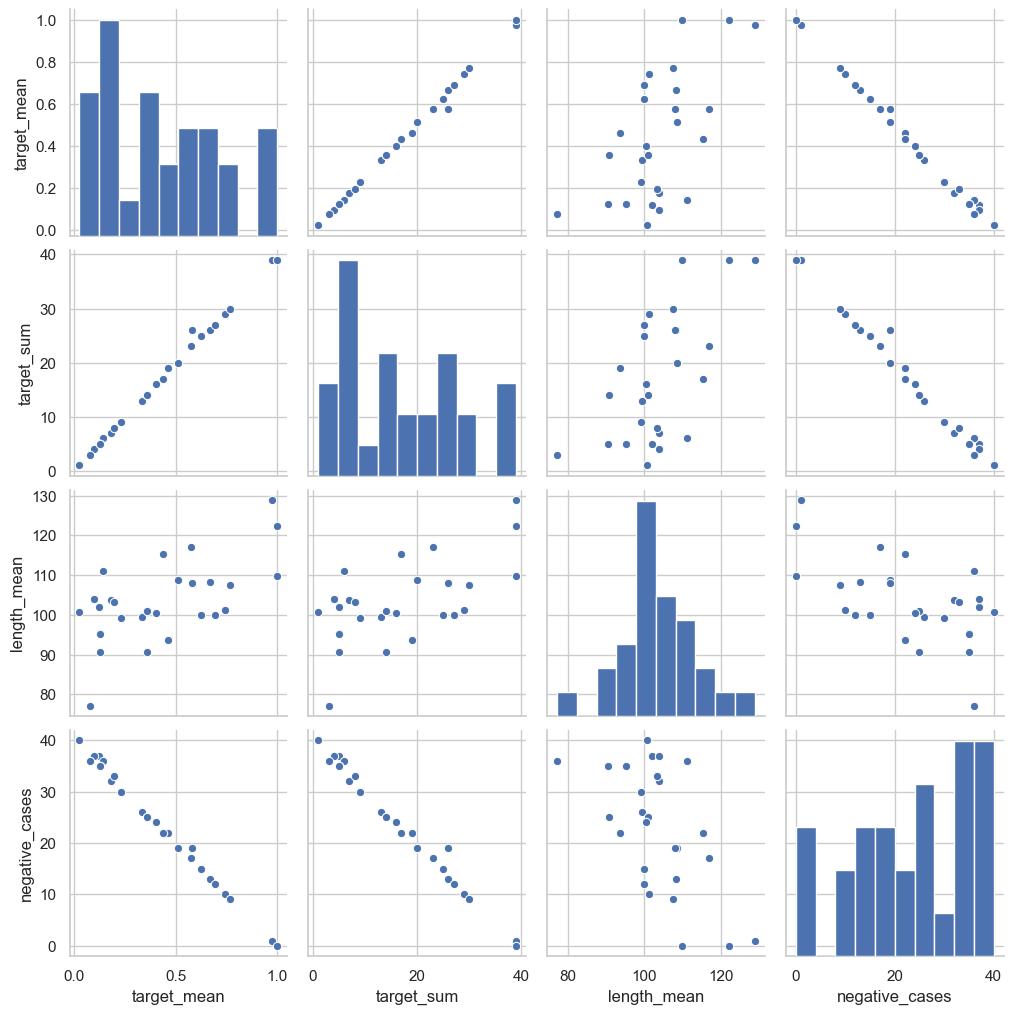

In [263]:
# correlations
corr_df = top_kw[['target_mean', 'target_sum', 'length_mean', 'negative_cases']]
sns.pairplot(corr_df)

In [264]:
corr_df.corr()

,target_mean,target_sum,length_mean,negative_cases
target_mean,1.00,1.00,0.62,-1.00
target_sum,1.00,1.00,0.62,-0.99
length_mean,0.62,0.62,1.00,-0.59
negative_cases,-1.00,-0.99,-0.59,1.00


In [265]:
top_kw.describe()

,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
count,28.00,28.00,28.00,28.00,28.00,28.00,28.00
mean,16.93,39.96,0.43,0.38,103.40,31.15,23.04
std,11.77,1.37,0.30,0.15,10.28,5.45,12.11
min,1.00,39.00,0.02,0.00,77.15,16.01,0.00
25%,5.75,39.00,0.14,0.33,99.39,27.57,14.50
50%,15.00,39.50,0.38,0.43,101.68,30.93,24.50
75%,26.00,40.25,0.64,0.49,108.38,36.30,35.00
max,39.00,45.00,1.00,0.51,128.93,39.93,40.00


### This only represents 15% of the dataset

In [266]:
top_kw['target_count'].sum()/train_df.shape[0]

0.1469854196768685

Text(0, 0.5, 'Density')

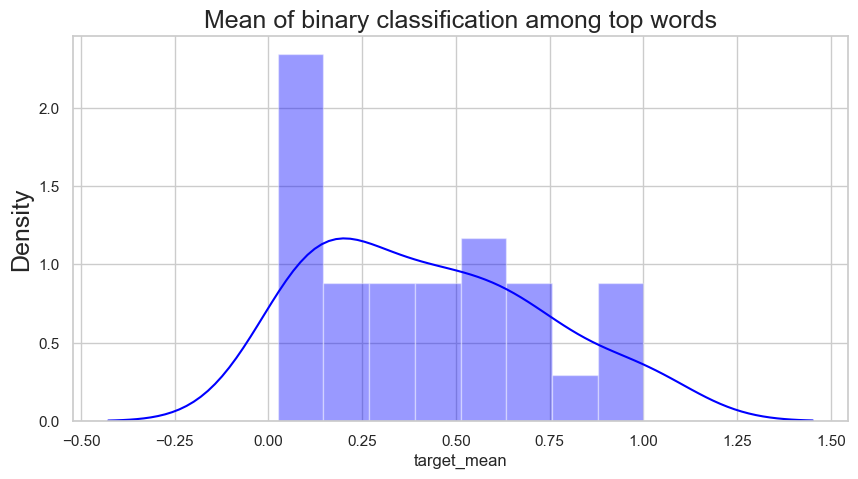

In [267]:
g = sns.distplot(top_kw["target_mean"], color="blue", label='Classification distribution', hist=True, bins=8)
g.set_title("Mean of binary classification among top words", fontsize=18)
g.set_ylabel("Density", fontsize=18)

## As we can see, there are a lot of top keyword associated with contributing fake cases
this words are (mean < 0.15):

In [268]:
kw_low_mean = top_kw[top_kw['target_mean'] < 0.15]
kw_low_mean

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
0,armageddon,5,42,0.12,0.33,102.02,33.40,37
1,body%20bags,1,41,0.02,0.16,100.78,37.69,40
5,deluge,6,42,0.14,0.35,111.17,30.27,36
12,fear,5,40,0.12,0.33,95.33,39.93,35
14,harm,4,41,0.10,0.30,103.98,33.21,37
19,siren,5,40,0.12,0.33,90.58,36.37,35
21,twister,5,40,0.12,0.33,95.30,36.69,35
27,wrecked,3,39,0.08,0.27,77.15,32.11,36


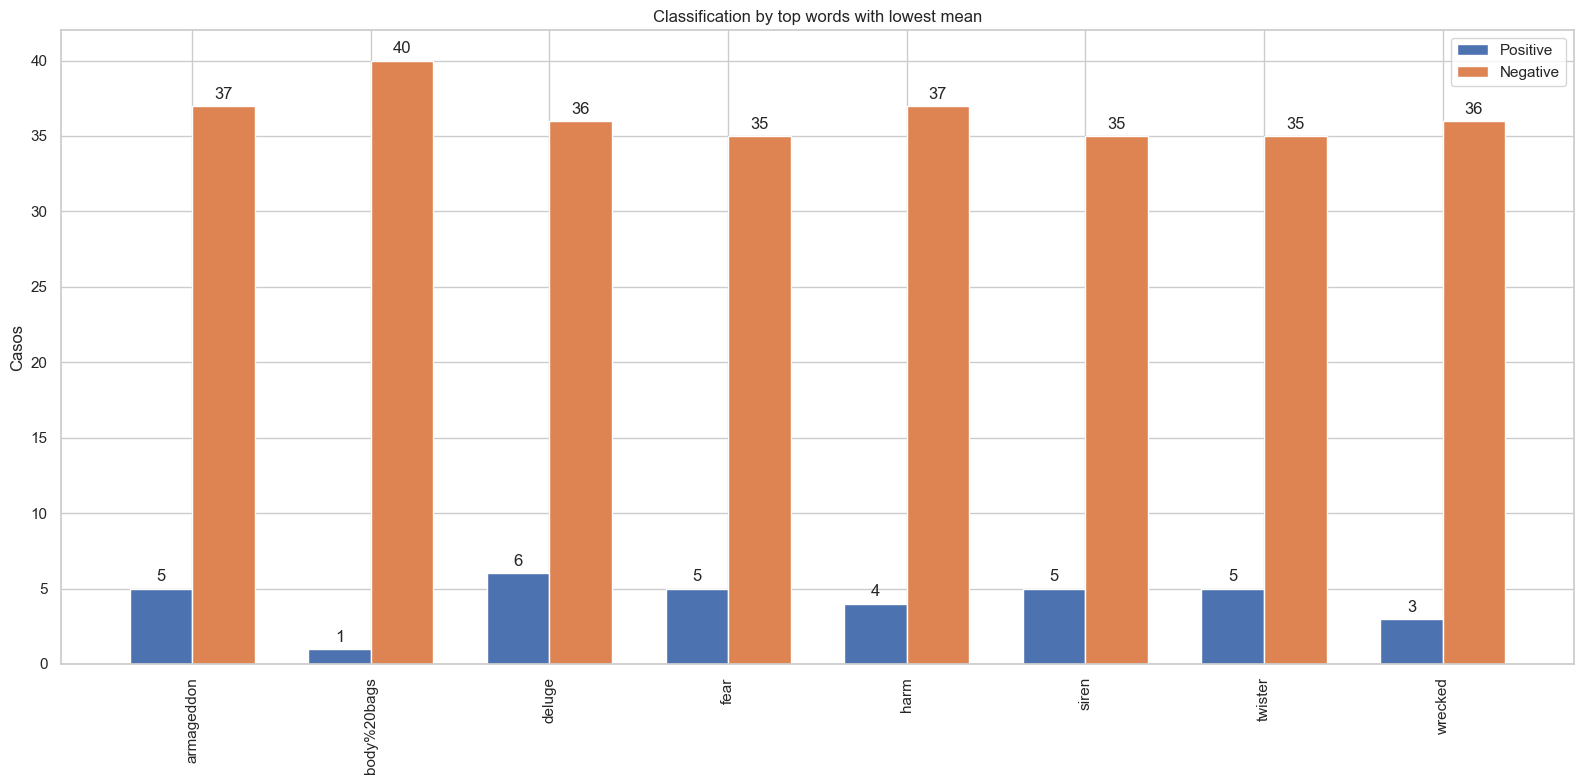

In [269]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = list(top_kw[top_kw['target_mean'] < 0.15]['keyword'])
postive_cases = list(top_kw[top_kw['target_mean'] < 0.15]['target_sum'])
negative_cases = list(top_kw[top_kw['target_mean'] < 0.15]['negative_cases'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, postive_cases, width, label='Positive')
rects2 = ax.bar(x + width/2, negative_cases, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Casos')
ax.set_title('Classification by top words with lowest mean')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Lets take a look at the ones with high mean (> 0.75)

In [270]:
kw_top_mean = top_kw[top_kw['target_mean'] > 0.75]
kw_top_mean

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
6,derailment,39,39,1.00,0.00,109.79,25.09,0
7,earthquake,30,39,0.77,0.43,107.64,34.69,9
16,outbreak,39,40,0.97,0.16,128.93,16.01,1
26,wreckage,39,39,1.00,0.00,122.26,24.76,0


### Lets analyze the locations

In [271]:
train_df['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [272]:
train_df['location'].head(100)

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
              ...         
95               Charlotte
96         Baton Rouge, LA
97          Hagerstown, MD
98    Gloucestershire , UK
99                     NaN
Name: location, Length: 100, dtype: object

In [273]:
real_location_counts = train_df['location'].value_counts()
real_location_counts.head(100)

USA               104
New York           71
United States      50
London             45
Canada             29
                 ... 
Indiana             5
Leeds, England      5
Pakistan            5
Philippines         5
Asheville, NC       5
Name: location, Length: 100, dtype: int64

In [274]:
real_location_frame['location'].mean()

NameError: name 'real_location_frame' is not defined

### Lets analyze top of those

In [ ]:
train_df['location'].value_counts()

### Lets keep those representative with more than 20 ocurrencies

In [ ]:
loc_more_than_20 = train_df.groupby("location").filter(lambda x: len(x) >= 20)

In [ ]:
top_loc = loc_more_than_20.groupby('location').agg({'target': ['sum','count', 'mean', 'std']})
level0 = top_loc.columns.get_level_values(0)
level1 = top_loc.columns.get_level_values(1)
top_loc.columns = level0 + '_' + level1
top_loc = top_loc.reset_index()
top_loc['negative_cases'] = top_loc['target_count'] - top_loc['target_sum']
top_loc

In [ ]:
top_loc.mean()

In [ ]:
train_df['location'].value_counts()

In [ ]:
# lets see mean distrubution

In [ ]:
g = sns.distplot(top_loc["target_mean"], color="blue", label='Classification distribution', hist=True, bins=4)
g.set_title("Mean of binary classification among top locations", fontsize=18)
g.set_ylabel("Density", fontsize=18)

### Words analysis

In [ ]:
train_df['text']

In [279]:
# based on: https://sigdelta.com/blog/text-analysis-in-pandas/
# https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words)) if len(words) > 0 else 0

from textblob import TextBlob
from nltk.corpus import stopwords
stop = stopwords.words('english')

train_df['stopwords'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
train_df['hashtags'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train_df['mentions'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train_df['numerics'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train_df['upper'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train_df['avg_word'] = train_df['text'].apply(lambda x: avg_word(x))
train_df.head()

,id,keyword,location,text,target,words_count,length,stopwords,hashtags,mentions,numerics,upper,avg_word
0,1,NaN,NaN,Our are the Reason of this #earthquake May us all,1,13,69,5,1,0,0,0,4.00
1,4,NaN,NaN,Forest fire near La Canada,1,7,38,0,0,0,0,0,4.40
2,5,NaN,NaN,All residents asked to in are being by No othe...,1,22,133,9,0,0,0,0,4.50
3,6,NaN,NaN,people receive #wildfires evacuation orders in...,1,8,65,1,1,0,0,0,7.29
4,7,NaN,NaN,Just got sent this photo from #Alaska as smoke...,1,16,88,6,2,0,0,0,4.50


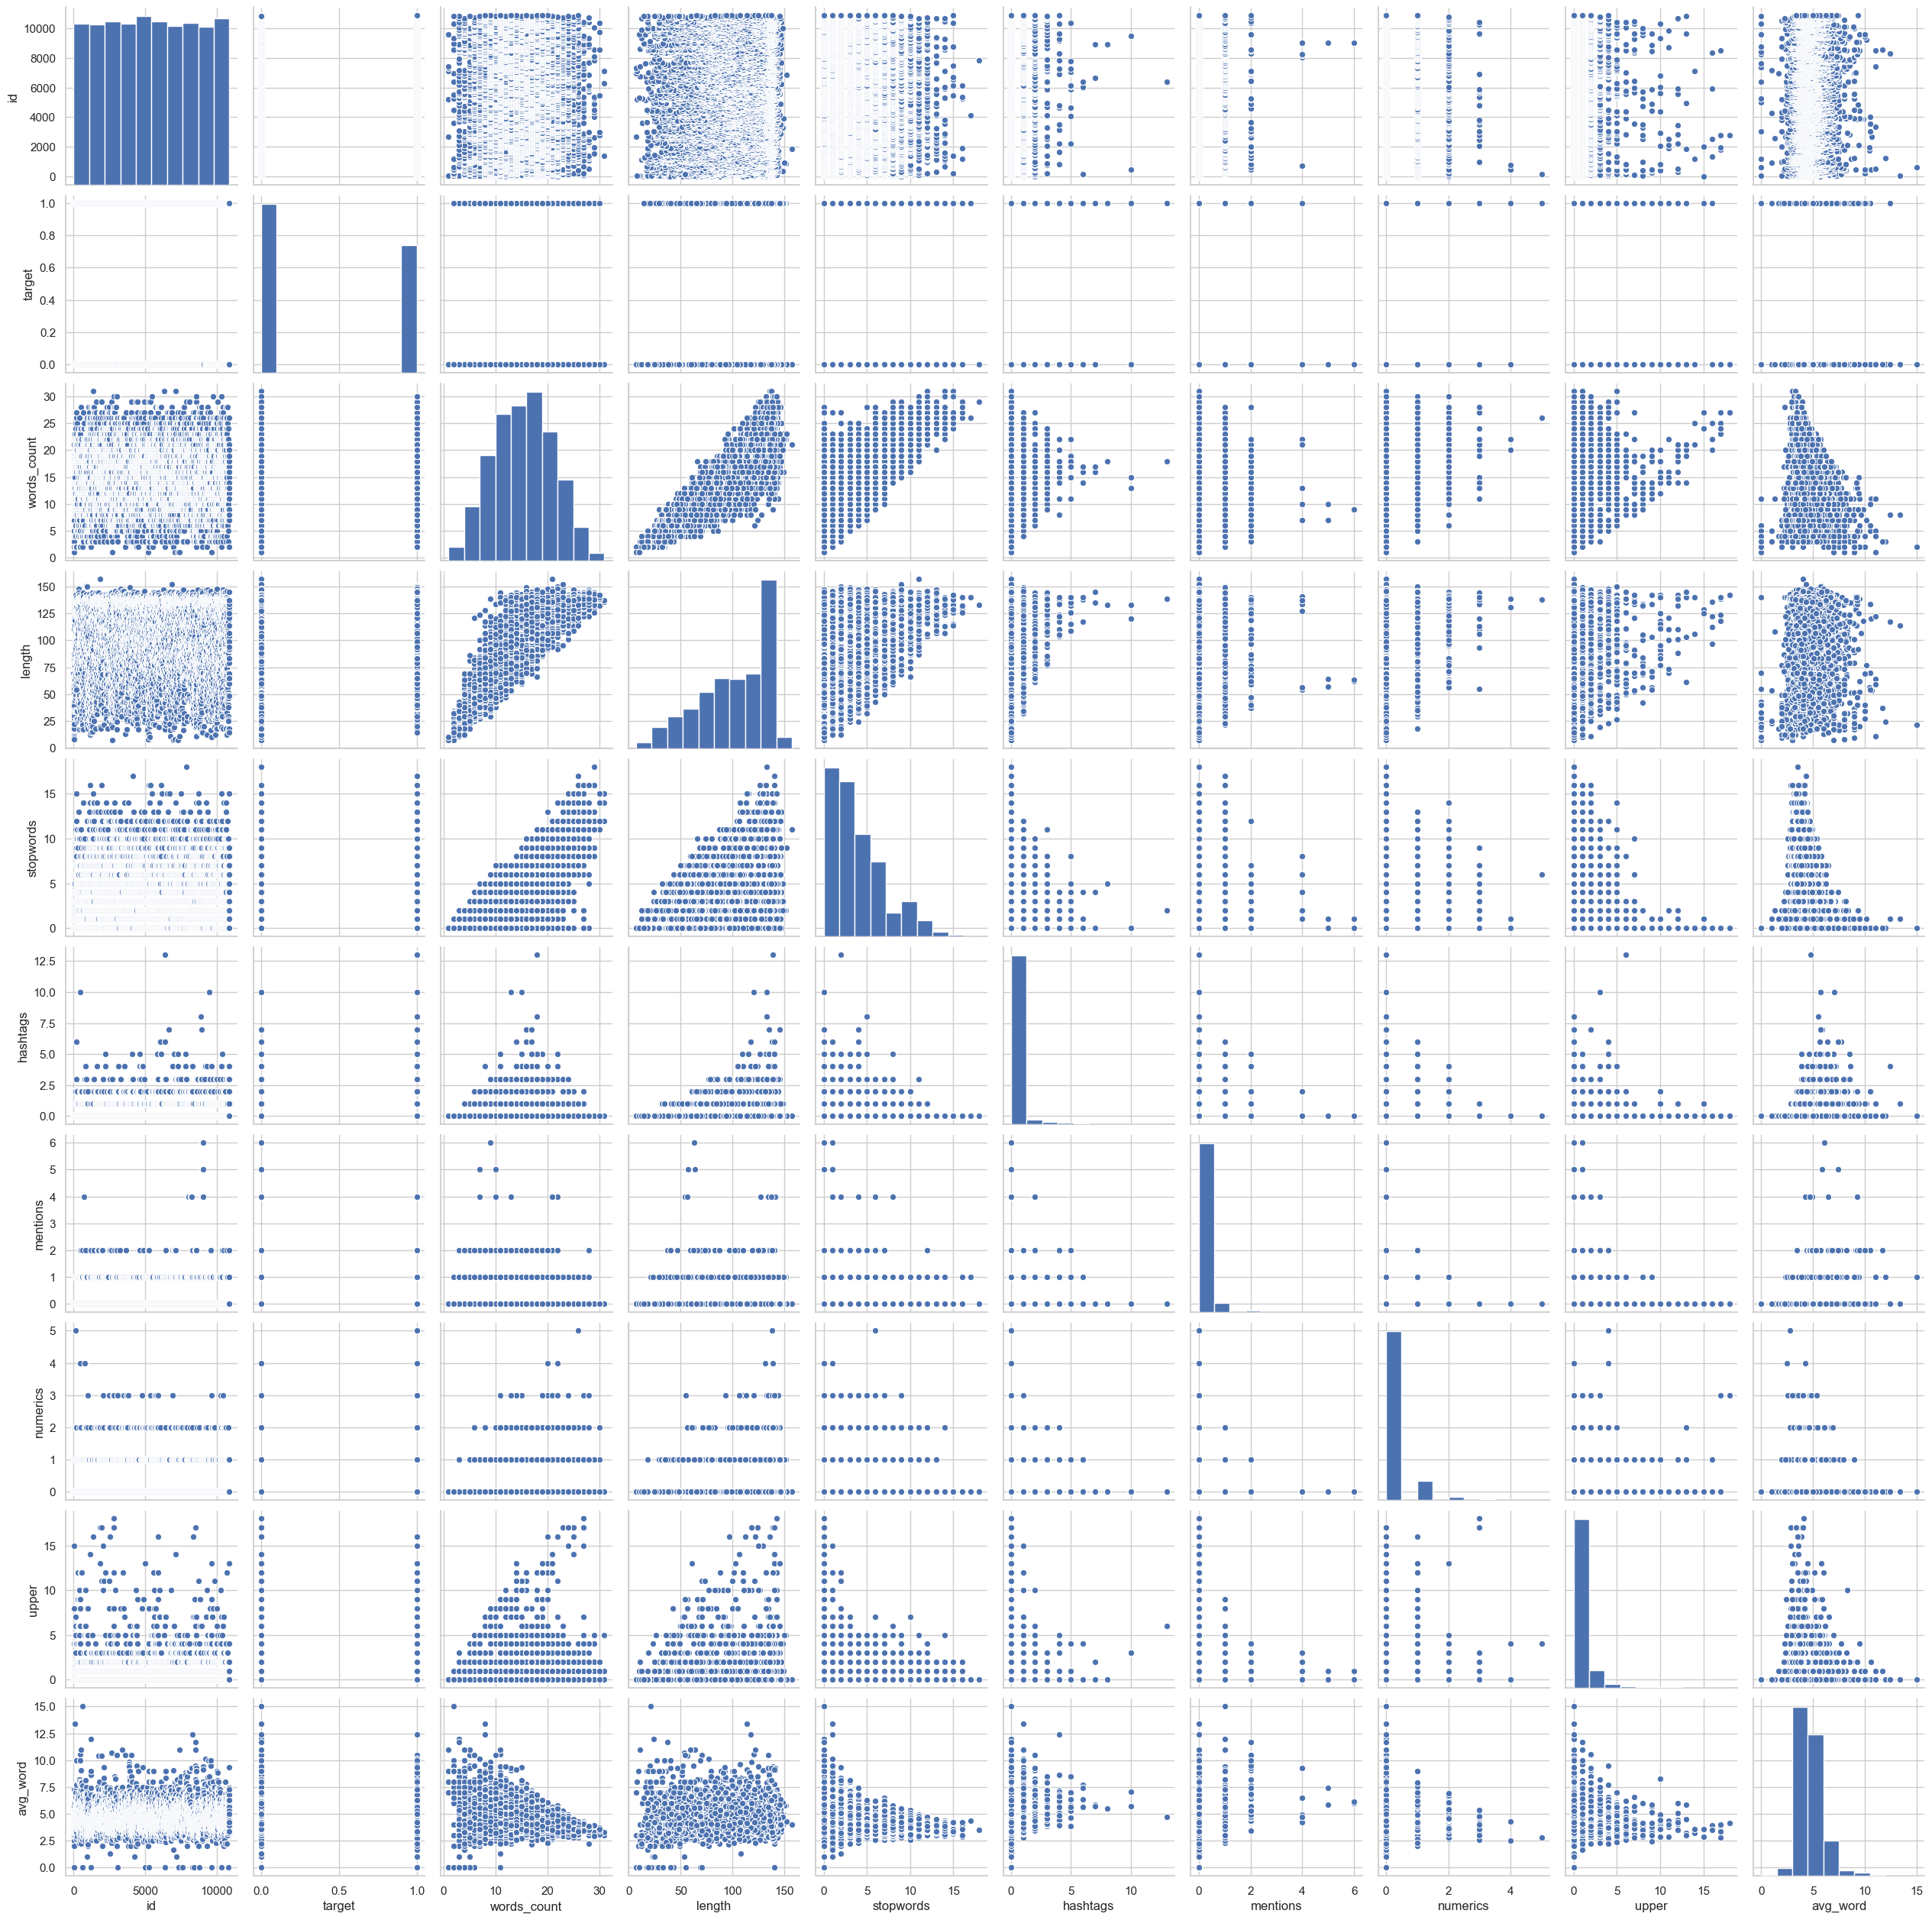

In [280]:
sns.pairplot(train_df)

In [281]:
train_df.corr()

,id,target,words_count,length,stopwords,hashtags,mentions,numerics,upper,avg_word
id,1.00,0.06,0.01,0.02,-0.00,0.02,-0.02,-0.01,0.00,0.04
target,0.06,1.00,0.04,0.18,-0.08,0.07,-0.04,0.09,-0.01,0.22
words_count,0.01,0.04,1.00,0.84,0.73,0.03,-0.00,0.15,0.16,-0.25
length,0.02,0.18,0.84,1.00,0.41,0.15,0.02,0.15,0.11,0.08
stopwords,-0.00,-0.08,0.73,0.41,1.00,-0.11,-0.03,-0.04,-0.10,-0.37
hashtags,0.02,0.07,0.03,0.15,-0.11,1.00,0.04,0.03,0.08,0.23
mentions,-0.02,-0.04,-0.00,0.02,-0.03,0.04,1.00,-0.00,0.05,0.15
numerics,-0.01,0.09,0.15,0.15,-0.04,0.03,-0.00,1.00,0.08,-0.04
upper,0.00,-0.01,0.16,0.11,-0.10,0.08,0.05,0.08,1.00,-0.09
avg_word,0.04,0.22,-0.25,0.08,-0.37,0.23,0.15,-0.04,-0.09,1.00


In [282]:
# Preprocessing
# removing punctuation
train_df['text'] = train_df['text'].str.replace('[^\w\s]','')
# Lower case
train_df['text'] = train_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# remove stop words
train_df['text'] = train_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train_df

,id,keyword,location,text,target,words_count,length,stopwords,hashtags,mentions,numerics,upper,avg_word
0,1,NaN,NaN,reason earthquake may us,1,13,69,5,1,0,0,0,4.00
1,4,NaN,NaN,forest fire near la canada,1,7,38,0,0,0,0,0,4.40
2,5,NaN,NaN,residents asked evacuation shelter place order...,1,22,133,9,0,0,0,0,4.50
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1,8,65,1,1,0,0,0,7.29
4,7,NaN,NaN,got sent photo alaska smoke wildfires school,1,16,88,6,2,0,0,0,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1,11,83,2,0,0,0,0,5.10
7609,10870,NaN,NaN,aria_ahrary thetawniest control wild fires cal...,1,20,125,7,0,2,0,0,5.30
7610,10871,NaN,NaN,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1,8,65,1,0,0,0,2,7.25
7611,10872,NaN,NaN,police investigating ebike collided car little...,1,19,137,5,0,0,0,0,6.26


In [283]:
# Lets see most common words
freq = pd.Series(' '.join(train_df['text']).split()).value_counts()[:15]
freq

like         343
amp          297
im           296
fire         243
get          227
new          218
via          217
people       191
dont         187
news         186
one          185
video        158
us           156
emergency    153
2            150
dtype: int64

In [284]:
# freq = list(freq.index)
# train_df['text'] = train_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# train_df.head()

In [285]:
# rare words removal
words = pd.Series(' '.join(train_df['text']).split()).value_counts()
words = words[words == 1]
words

Series([], dtype: int64)

In [286]:
words = words.index
train_df['text'] = train_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
train_df.head()

,id,keyword,location,text,target,words_count,length,stopwords,hashtags,mentions,numerics,upper,avg_word
0,1,NaN,NaN,reason earthquake may us,1,13,69,5,1,0,0,0,4.00
1,4,NaN,NaN,forest fire near la canada,1,7,38,0,0,0,0,0,4.40
2,5,NaN,NaN,residents asked evacuation shelter place order...,1,22,133,9,0,0,0,0,4.50
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1,8,65,1,1,0,0,0,7.29
4,7,NaN,NaN,got sent photo alaska smoke wildfires school,1,16,88,6,2,0,0,0,4.50


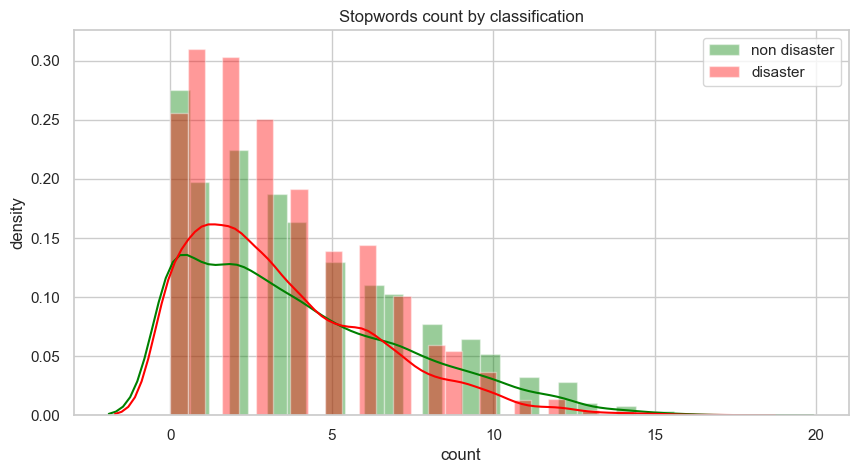

In [289]:
x = train_df[train_df["target"] == 0]["stopwords"]
y = train_df[train_df["target"] == 1]["stopwords"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Stopwords count by classification')
plt.xlabel('count')
plt.ylabel('density')

plt.show()

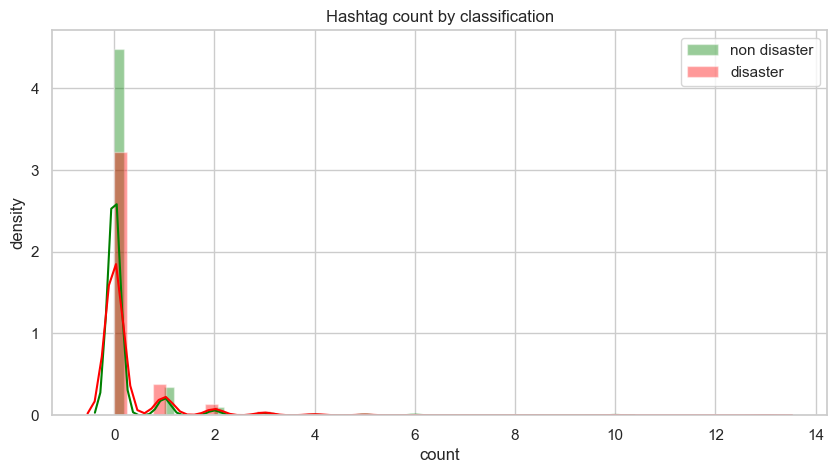

In [290]:
x = train_df[train_df["target"] == 0]["hashtags"]
y = train_df[train_df["target"] == 1]["hashtags"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Hashtag count by classification')
plt.xlabel('count')
plt.ylabel('density')

plt.show()

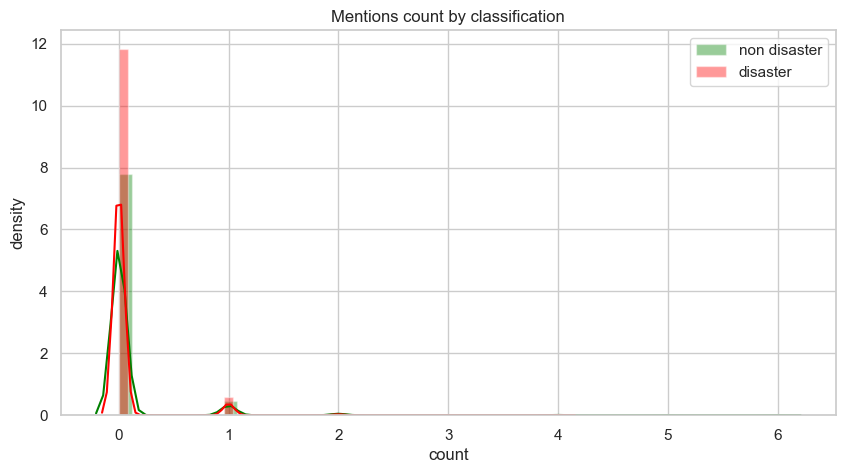

In [291]:
x = train_df[train_df["target"] == 0]["mentions"]
y = train_df[train_df["target"] == 1]["mentions"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Mentions count by classification')
plt.xlabel('count')
plt.ylabel('density')

plt.show()

### Most of the tweets dont have hashtags or mentions

In [132]:
# # Spelling corrections
# from textblob import TextBlob
# train_df['text'].apply(lambda x: str(TextBlob(x).correct()))
# train_df.head()

In [ ]:
# # Steamming
# from nltk.stem import PorterStemmer
# st = PorterStemmer()
# train_df['text'] = train_df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
# train_df['text'].head()

In [ ]:
# # Lemmatization
# from textblob import Word
# train_df['text'] = train_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
# train_df.head()

In [295]:
# Tokenize
train_df['words'] = train_df.text.str.strip().str.split('[\W_]+')
train_df.head()

,id,keyword,location,text,target,words_count,length,stopwords,hashtags,mentions,numerics,upper,avg_word,words
0,1,NaN,NaN,reason earthquake may us,1,13,69,5,1,0,0,0,4.00,"[reason, earthquake, may, us]"
1,4,NaN,NaN,forest fire near la canada,1,7,38,0,0,0,0,0,4.40,"[forest, fire, near, la, canada]"
2,5,NaN,NaN,residents asked evacuation shelter place order...,1,22,133,9,0,0,0,0,4.50,"[residents, asked, evacuation, shelter, place,..."
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1,8,65,1,1,0,0,0,7.29,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,got sent photo alaska smoke wildfires school,1,16,88,6,2,0,0,0,4.50,"[got, sent, photo, alaska, smoke, wildfires, s..."


In [331]:
disaster = train_df[train_df['target']==1]
rows = list()
for row in disaster[['id', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.id, word))

words = pd.DataFrame(rows, columns=['tw_id', 'word'])
words.head()

,tw_id,word
0,1,reason
1,1,earthquake
2,1,may
3,1,us
4,4,forest


In [332]:
words = words[words.word.str.len() > 0]
words.head()

,tw_id,word
0,1,reason
1,1,earthquake
2,1,may
3,1,us
4,4,forest


In [333]:
counts = words.groupby('tw_id')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
tw_id word           
1     earthquake    1
      may           1
      reason        1
      us            1
4     canada        1

n_w
tw_id word           
1     earthquake    1
      may           1
      reason        1
      us            1
4     canada        1
...               ...
10873 abc           1
      california    1
      homes         1
      latest        1
      news          1

[15218 rows x 1 columns]

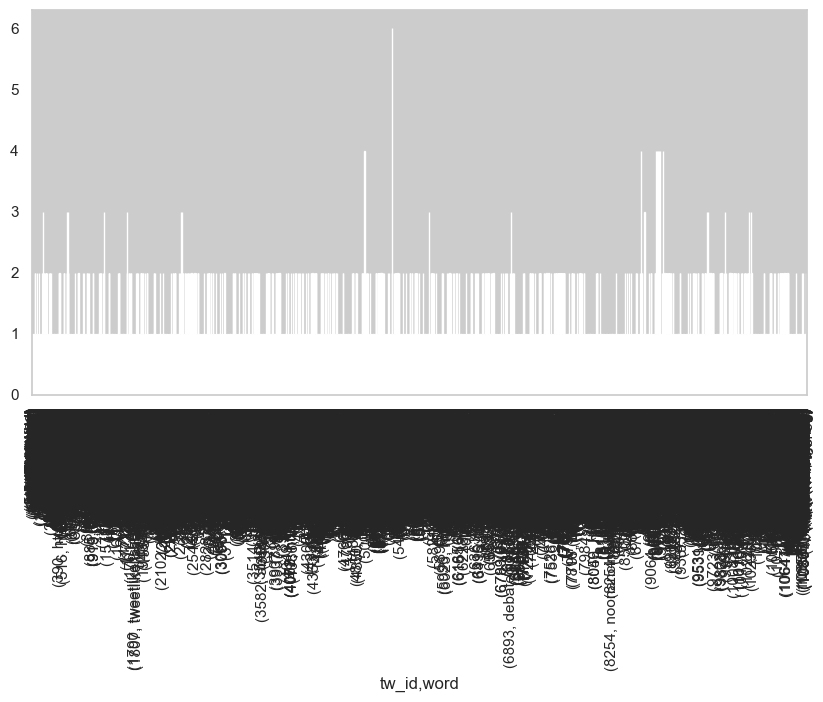

In [336]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
#     r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])

In [337]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
tw_id,
1,4
4,5
5,7
6,6
7,7
...,...
10869,8
10870,12
10871,6


In [338]:
tf = counts.join(word_sum)
tf['tf'] = tf.n_w/tf.n_d
tf.head()

n_w  n_d                   tf
tw_id word                                     
1     earthquake    1    4                 0.25
      may           1    4                 0.25
      reason        1    4                 0.25
      us            1    4                 0.25
4     canada        1    5                 0.20

tf
tw_id word                           
1     earthquake                 0.25
      may                        0.25
      reason                     0.25
      us                         0.25
4     canada                     0.20
...                               ...
10873 abc                        0.12
      california                 0.12
      homes                      0.12
      latest                     0.12
      news                       0.12

[15218 rows x 1 columns]

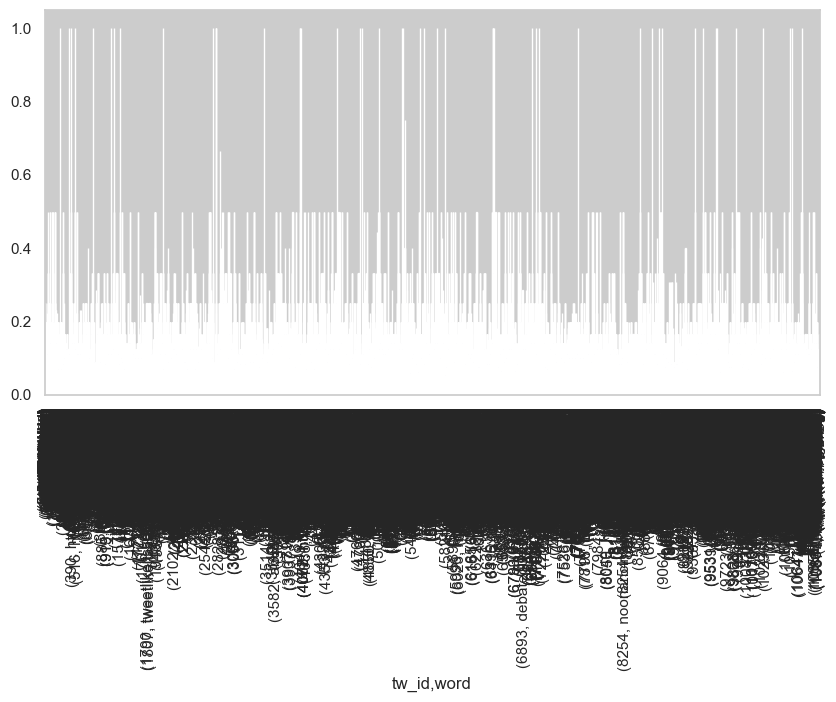

In [339]:
pretty_plot_top_n(tf['tf'])

In [340]:
c_d = words.target.nunique()
c_d

AttributeError: 'DataFrame' object has no attribute 'target'

In [322]:
idf = words.groupby('word')\
    .target\
    .nunique()\
    .to_frame()\
    .rename(columns={'target':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
word,
kidnapped,1
sean,1
girlfriend,1
scuf,1
screenshots,1


In [324]:
idf['idf'] = np.log(c_d/idf.i_d.values)
idf.head()

,i_d,idf
word,,
kidnapped,1,0.69
sean,1,0.69
girlfriend,1,0.69
scuf,1,0.69
screenshots,1,0.69


In [325]:
tf_idf = tf.join(idf)
tf_idf.head()

n_w    n_d                   tf  i_d                  idf
target word                                                           
0      like  251  28117                 0.01    2                 0.00
       im    242  28117                 0.01    2                 0.00
       amp   191  28117                 0.01    2                 0.00
       new   166  28117                 0.01    2                 0.00
       get   161  28117                 0.01    2                 0.00

In [326]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w    n_d                   tf  i_d                  idf  \
target word                                                              
0      like  251  28117                 0.01    2                 0.00   
       im    242  28117                 0.01    2                 0.00   
       amp   191  28117                 0.01    2                 0.00   
       new   166  28117                 0.01    2                 0.00   
       get   161  28117                 0.01    2                 0.00   

                          tf_idf  
target word                       
0      like                 0.00  
       im                   0.00  
       amp                  0.00  
       new                  0.00  
       get                  0.00

tf_idf
target word                             
0      aftershock                   0.00
       fashion                      0.00
       awesome                      0.00
       lmao                         0.00
       career                       0.00
1      mh370                        0.00
       northern                     0.00
       bomber                       0.00
       legionnaires                 0.00
       debris                       0.00

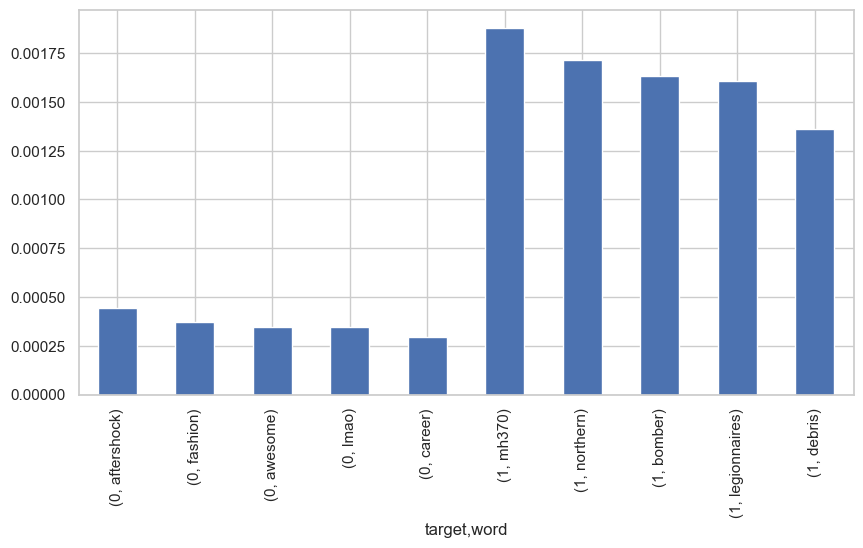

In [327]:
pretty_plot_top_n(tf_idf['tf_idf'])